# AI and ML 12211810 潘炜 homework 02

import necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class specification

In [2]:
class LinearRegresssion:
    def __init__(self, n_feature = 1, learning_rate=0.0001, batch_size=10,epoches=10000):
        self.epoches = epoches
        self.learning_rate = learning_rate
        self.tole = 1e-5
        self.batch_size = batch_size
        self.W = np.random.randn(n_feature + 1) * 0.05

    # stochastic gradient descent
    def _SGD_update(self, input, groundtruth):
        pred = input.dot(self.W)
        seed = np.random.randint(0, len(input))
        grad = self._gradient(groundtruth[seed], pred[seed], input[seed,:][np.newaxis, :]) # to ensure the shape is (,2) instead of (2,)
        self.W = self.W - self.learning_rate * grad

    # batch gradient descent
    def _BGD_update(self, input, groundtruth):
        pred = input.dot(self.W)
        grad = self._gradient(groundtruth, pred, input)
        self.W = self.W - self.learning_rate * grad

    # 10 percent of mini batch graident descent 
    def _MBGD_update(self, input, groundtruth):
        pred = input.dot(self.W)
        indices = np.random.choice(groundtruth.shape[0], self.batch_size, replace=False)
        grad = self._gradient(groundtruth[indices], pred[indices], input[indices])
        self.W = self.W - self.learning_rate * grad
    
    def _mse_loss(self, groundtruth, predict):
        return np.mean((groundtruth - predict) ** 2)
    
    def _gradient(self, groudtruth, predict, input):
        return 1 / input.shape[0] * np.mean(2 * (predict - groudtruth ) * input[:,:-1])

    def fit(self, X, y):
        X = np.c_[X, np.ones(len(X))]
        for i in range(self.epoches):
            # loss = self._SGD_update(X, y)
            # loss = self._BGD_update(X, y)
            self._MBGD_update(X, y)
            if i % 100 == 0:
                loss = self._mse_loss(y, X.dot(self.W))
                print(f"for {i} iteration, the loss is {loss}")
        return self.W

data generation

In [3]:
X_train = np.arange(100).reshape(100,1)
a, b = 1, 10
y_train = a * X_train + b + np.random.normal(0, 5, size=X_train.shape)
y_train = y_train.reshape(-1)

training 

for 0 iteration, the loss is 4166.575831098297
for 100 iteration, the loss is 45.720965351709566
for 200 iteration, the loss is 50.091425908574486
for 300 iteration, the loss is 51.68661520794612
for 400 iteration, the loss is 44.88588922621224
for 500 iteration, the loss is 48.44761840405531
for 600 iteration, the loss is 49.10979491805941
for 700 iteration, the loss is 44.52111449923006
for 800 iteration, the loss is 46.03970719837695
for 900 iteration, the loss is 47.40354790931346
for 1000 iteration, the loss is 45.092571586905585
for 1100 iteration, the loss is 46.61174696848073
for 1200 iteration, the loss is 46.15504445489637
for 1300 iteration, the loss is 46.716924759881515
for 1400 iteration, the loss is 46.640497967557515
for 1500 iteration, the loss is 47.706718730376316
for 1600 iteration, the loss is 47.92438521200147
for 1700 iteration, the loss is 45.96018447612253
for 1800 iteration, the loss is 48.52328414095623
for 1900 iteration, the loss is 47.461918395626384
for 2

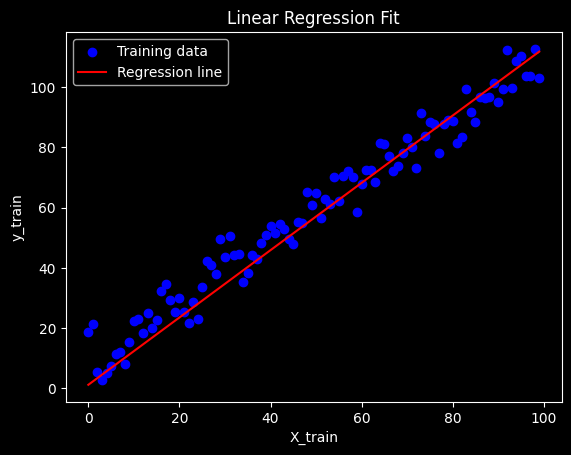

In [4]:
model = LinearRegresssion(n_feature=X_train.shape[1])
w = model.fit(X_train, y_train)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')

x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = w[0] + w[1] * x_values
plt.plot(x_values, y_values, color='red', label='Regression line')

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

In [4]:
import numpy as np

# 假设有 3 个样本和 2 个特征（包括偏置项）
input = np.array([[1, 1],
                  [3, 1],
                  [5, 1]])

# 假设预测值和真实值
predict = np.array([[0.5],
                    [1.5],
                    [2.5]])

groundtruth = np.array([[1],
                        [2],
                        [3]])

# 计算梯度
gradient = 1 / input.shape[0] * np.dot(input.T, (predict - groundtruth))

print("Input matrix (input):")
print(input)
print("\nPredict vector (predict):")
print(predict)
print("\nGroundtruth vector (groundtruth):")
print(groundtruth)
print("\nGradient (1 / input.shape[0] * np.dot(input.T, (predict - groundtruth))):")
print(gradient)

Input matrix (input):
[[1 1]
 [3 1]
 [5 1]]

Predict vector (predict):
[[0.5]
 [1.5]
 [2.5]]

Groundtruth vector (groundtruth):
[[1]
 [2]
 [3]]

Gradient (1 / input.shape[0] * np.dot(input.T, (predict - groundtruth))):
[[-1.5]
 [-0.5]]
